# Project Overview
This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period.

This case requires to develop a customer segmentation to define marketing strategy.

### Column description
- CUST_ID: Identification of Credit Card holder (Categorical)
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account 
- CASH_ADVANCE: Cash in advance given by the user
- CREDIT_LIMIT: Limit of Credit Card for user 
- PAYMENTS: Amount of Payment done by user 

In [3]:
# importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans


In [9]:
# loading in our dataset
df = pd.read_csv('Credit_card_dataset.csv')
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


# Data Exploration

In [12]:
# checking the shape of the DataFrame, (rows and columns)
df.shape 

(8950, 6)

In [14]:
df.columns # column names

Index(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
       'CASH_ADVANCE'],
      dtype='object')

In [16]:
# checking for null values
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [18]:
# The number of unique(distinct) variables in each columns
df.nunique()

CUST_ID              8950
BALANCE_FREQUENCY      43
PURCHASES            6203
PAYMENTS             8711
CREDIT_LIMIT          205
CASH_ADVANCE         4323
dtype: int64

In [27]:
# checking the DataFrame for duplicates rows
df.loc[df.duplicated()]

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE


In [33]:
# checking duplicate for CUST_ID column
df.loc[df.duplicated(subset=['CUST_ID'])]

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE


In [22]:
# The description of the numeric labels(columns)
df.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [25]:
# confirming the datatypes of each columns
df.dtypes

CUST_ID               object
BALANCE_FREQUENCY    float64
PURCHASES            float64
PAYMENTS             float64
CREDIT_LIMIT         float64
CASH_ADVANCE         float64
dtype: object

# Data Preparation

In [37]:
# Filling the null value in the CREDIT_LIMIT column with 0
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(0)

In [41]:
# confirming our fillna
df.CREDIT_LIMIT.isnull().sum()

0

# Feature Understanding and Feature Relationships

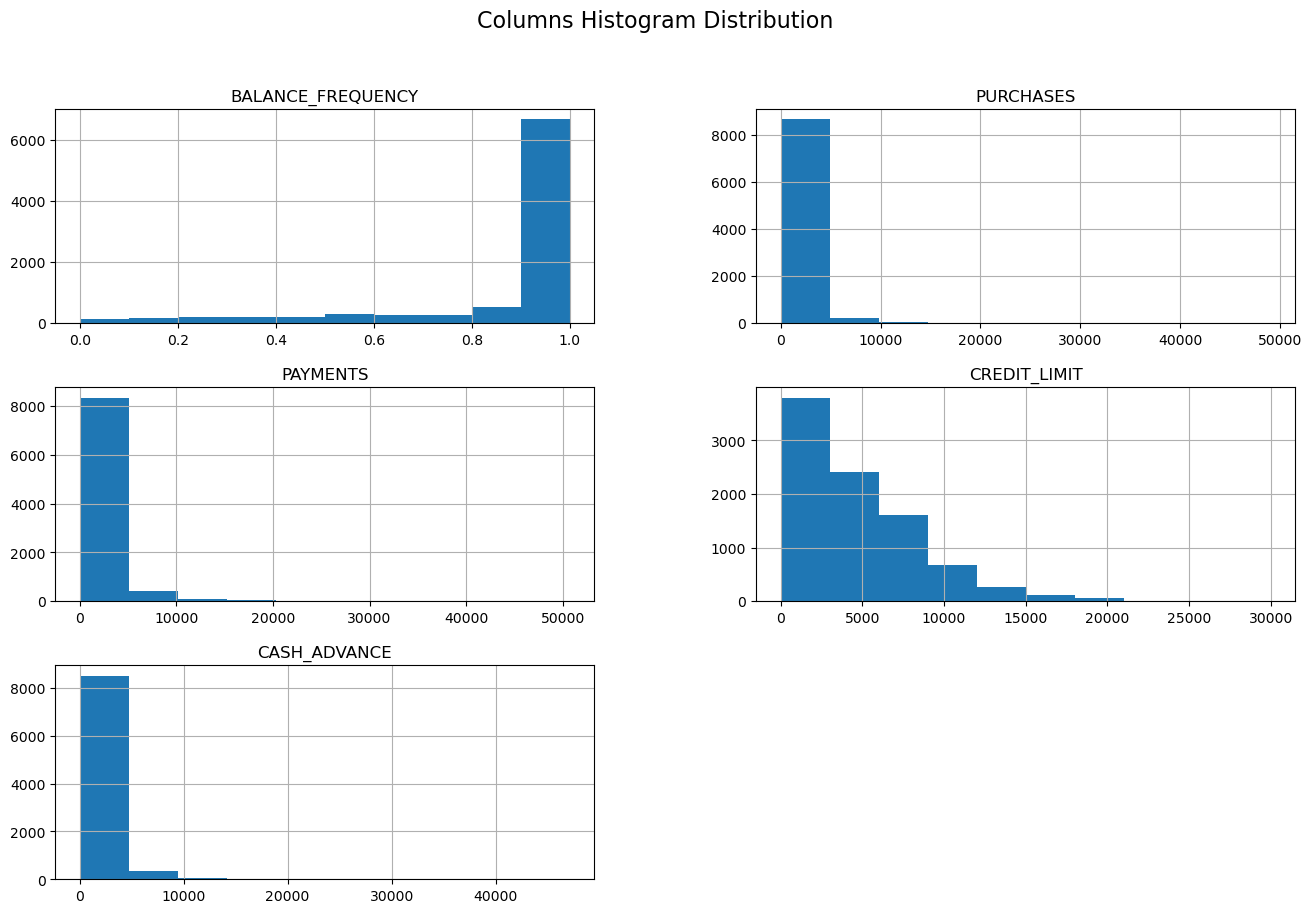

In [155]:
# Plotting the histogram distribution of all features(columns)
df.hist(figsize=(16,10))
plt.suptitle('Columns Histogram Distribution', fontsize=16)
plt.show()

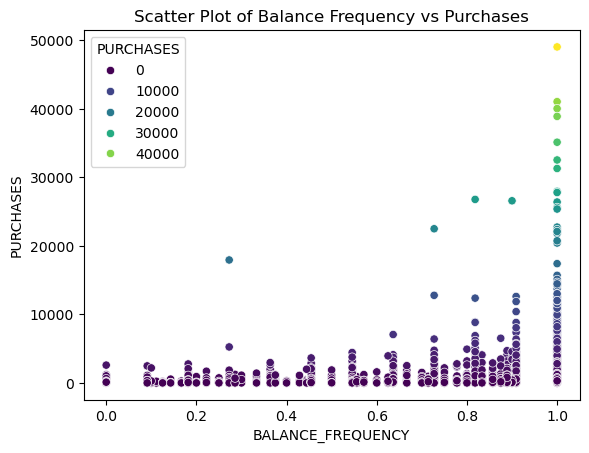

<Figure size 1600x800 with 0 Axes>

In [179]:
# Plotting the relationship between balance update frequency and thier respective purchases 
sns.scatterplot(
         x='BALANCE_FREQUENCY',
         y='PURCHASES',
         data=df,
         hue=df.PURCHASES,
        palette='viridis'
        )
plt.title('Scatter Plot of Balance Frequency vs Purchases')
plt.figure(figsize=(16, 8))
plt.show()

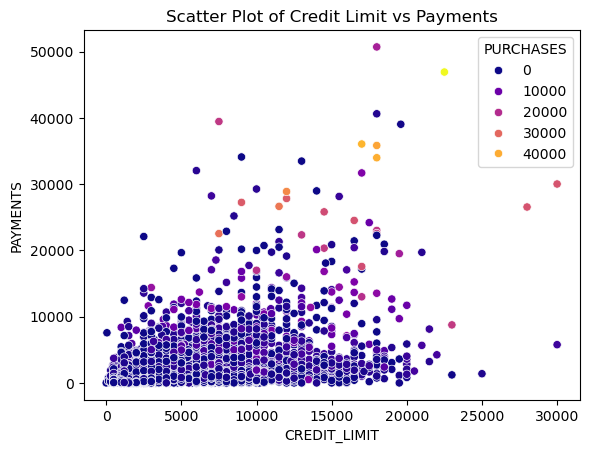

In [181]:
# plotting the relationship between Credit Limit and Payments
sns.scatterplot(
         x='CREDIT_LIMIT',
         y='PAYMENTS',
         data=df,
         hue=df.PURCHASES,
        palette='plasma')
plt.title('Scatter Plot of Credit Limit vs Payments')
plt.show()

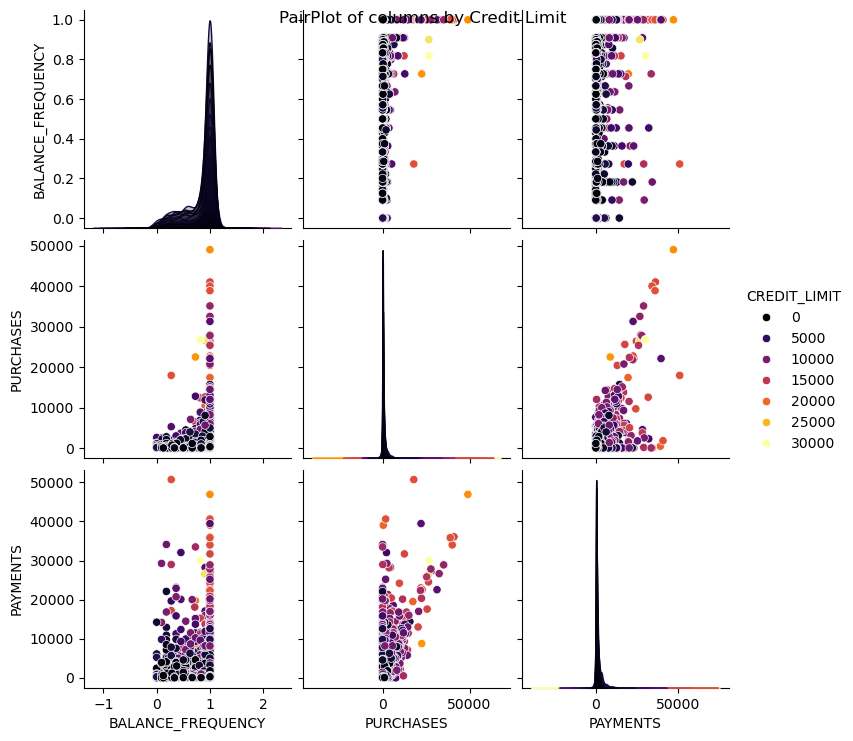

In [173]:
# PairPlot of columns by Credit Limit
sns.pairplot(df, 
            vars=['BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS'],
            hue='CREDIT_LIMIT',
            palette='inferno')
plt.suptitle('PairPlot of columns by Credit Limit')
plt.show()

In [177]:
# Viewing the numeric correlarion between each columns
df_corr = df[['BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'CASH_ADVANCE']].corr()
df_corr

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
BALANCE_FREQUENCY,1.000000,0.133674,0.065008,0.096200,0.099388
PURCHASES,0.133674,1.000000,0.603264,0.356993,-0.051474
PAYMENTS,0.065008,0.603264,1.000000,0.421899,0.453238
CREDIT_LIMIT,0.096200,0.356993,0.421899,1.000000,0.304009
CASH_ADVANCE,0.099388,-0.051474,0.453238,0.304009,1.000000


# Normalization and Training using Scikit-Learn

In [185]:
# Dropping the CUST_ID column and assigning it to a new df
new_df = df.drop('CUST_ID', axis=1)

In [190]:
# Import the normalization library
from sklearn.preprocessing import MinMaxScaler

In [192]:
# creating an instance of the model
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_df[['BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT']])

In [194]:
# Assigning the scaled_data which is in an array format into a dataframe
scaled_df = pd.DataFrame(scaled_data, columns=['BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'])

In [196]:
scaled_df.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT
0,0.818182,0.001945,0.003979,0.033333
1,0.909091,0.000000,0.080893,0.233333
2,1.000000,0.015766,0.012264,0.250000
3,0.636364,0.030567,0.000000,0.250000
4,1.000000,0.000326,0.013374,0.040000


In [200]:
# getting the within sum of squares values using FOR loop
range_1 = range(1, 10)
wcss1 = [] # declare an empty list
for i in range(1, 10):
    km=KMeans(n_clusters=i) # instatiate the model
    km.fit(scaled_df[['BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT']])
    wcss1.append(km.inertia_)

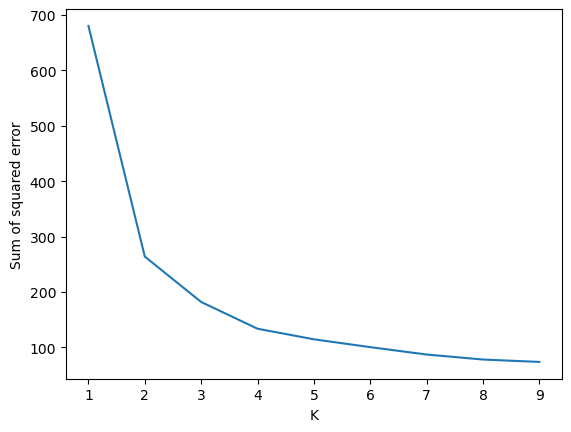

In [202]:
# plotting the elbow chart
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range_1, wcss1)
plt.show();

In [204]:
# Haven gotten our number of k to be 2, now we fit_predict on it
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

In [210]:
# creating another column on the scaled_df and assigning it to our clusters predict
scaled_df['CLUSTERS'] = clusters

In [216]:
scaled_df.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CLUSTERS
0,0.818182,0.001945,0.003979,0.033333,0
1,0.909091,0.000000,0.080893,0.233333,0
2,1.000000,0.015766,0.012264,0.250000,0
3,0.636364,0.030567,0.000000,0.250000,1
4,1.000000,0.000326,0.013374,0.040000,0


In [218]:
scaled_df['CLUSTERS'].unique()

array([0, 1], dtype=int32)

## Cluster Visualization Using PCA

In [222]:
from sklearn.decomposition import PCA

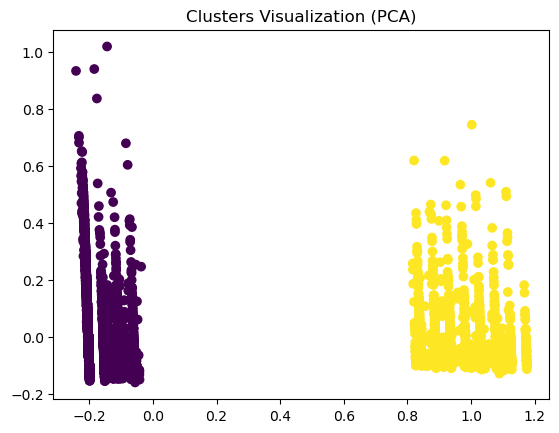

In [224]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=scaled_df.CLUSTERS, cmap='viridis')
plt.title('Clusters Visualization (PCA)')
plt.show()

# Evaluation metrics

In [ ]:
from sklearn.metrics import silhouette_score

In [236]:
score1 = silhouette_score(scaled_df, scaled_df.CLUSTERS)
print(f'Silhouette Score: {score1}')

Silhouette Score: 0.8354853373164766
